## QuantEcon Honours Workship
# Intorduction to Dynamic Programming
## Example 2: Cake eating with single decision-state grid

**Fedor Iskhakov**
*Research School of Economics, Australian National University*

We solve the cake eating problem given by the following Bellman equation
$$V(W_{t})=\max_{0 \le c_{t} \le W_t}\big\{u(c_{t})+\beta V(\underset{=W_{t}-c_{t}}{\underbrace{W_{t+1}}})\big\}$$
using value function iterations (VFI) with unified grid on state and desicion variable.

In [347]:
%matplotlib inline

In [348]:
import numpy as np
import matplotlib.pyplot as plt

## Solving for value function

In [349]:
# Setup
beta=.9        # Discount factor
Wbar=10        # Upper bound on cake size
ngrid=50       # Number of grid points
maxiter=1000   # Maximum number of iterations
epsilon=1e-4   # Small number

machine_epsilon=np.finfo(float).eps #smallest positive float number
grid=np.linspace(machine_epsilon,Wbar,ngrid).reshape(1,ngrid) #grid for both state and decision space

def Bellman(V0):
    #Bellman operator, V0 is vector-row of values on grid
    matW=np.repeat(grid,ngrid,0) #matrix with state space repeated in rows
    matWpr=np.repeat(np.transpose(grid),ngrid,1) #matrix with decision space repeated in columns
    matV0=np.repeat(np.transpose(V0),ngrid,1) #current value function repeated in columns
    c=matW-matWpr #level of cake consumtpion in current period
    c[c==0]=machine_epsilon #add small quantity to avoid log(0)
    mask=c>0 #mask off infeasible choices
    preV=-np.inf*np.ones((ngrid,ngrid)) #prepare space for trial values for all possible choices
    preV[mask]=np.log(c[mask])+beta*matV0[mask] #maximand of the Bellman equation
    V1=np.amax(preV,0,keepdims=True) #maximum in every column
    return V1

V0=np.log(grid)
for i in range(maxiter):
    V1=Bellman(V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1

print('Numerical solution:\nV(W)= ', V1)
print('W = ', grid)

if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')
    

Numerical solution:
V(W)=  [[-360.43568538 -325.9812672  -294.97229083 -267.0642121  -241.94694125
  -219.34139747 -198.99640808 -180.68591763 -164.20647622 -149.37497895
  -136.02663141 -124.01311862 -113.20095711 -103.47001176  -94.71216094
   -86.8300952   -79.73623603  -73.35176278  -67.60573686  -62.43431353
   -57.78003253  -53.59117963  -49.82121202  -46.42824117  -43.37456741
   -40.62626102  -38.15278527  -35.9266571   -33.92314174  -32.11997792
   -30.49713049  -29.03656779  -27.72206137  -26.53900558  -25.47425538
   -24.5159802   -23.65353253  -22.87732963  -22.17874702  -21.48559984
   -20.85687549  -20.23304303  -19.66719112  -19.1057419   -18.59647518
   -18.09117088  -17.63283083  -17.17805697  -16.76555092  -16.35625445]]
W =  [[  2.22044605e-16   2.04081633e-01   4.08163265e-01   6.12244898e-01
    8.16326531e-01   1.02040816e+00   1.22448980e+00   1.42857143e+00
    1.63265306e+00   1.83673469e+00   2.04081633e+00   2.24489796e+00
    2.44897959e+00   2.65306122e+00 

## Convergence behavior

Exercise: change the value of beta, V0, ngrid

In [350]:
beta=.9
# V0=np.log(grid)
V0=np.zeros((1,ngrid))

print('{:<4} {:>15} {:>10}'.format('Iter','Delta','D-ratio'))
diff0=0
for i in range(maxiter):
    V1=Bellman(V0)
    diff1=np.max(abs(V1-V0))
    if diff0==0:
        print('{:<4d} {:>15.10f}'.format(i,diff1))
    else:
        print('{:<4d} {:>15.10f} {:>10.5f}'.format(i,diff1,diff1/diff0))
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1
    diff0=diff1
if i+1<maxiter:
    print('Convergence achieved!')
else:
    print('No convergence: maximum number of iterations achieved!')


Iter           Delta    D-ratio
0      36.0436533891
1      32.4392880502    0.90000
2      29.1953592452    0.90000
3      26.2758233207    0.90000
4      23.6482409886    0.90000
5      21.2834168897    0.90000
6      19.1550752008    0.90000
7      17.2395676807    0.90000
8      15.5156109126    0.90000
9      13.9640498214    0.90000
10     12.5676448392    0.90000
11     11.3108803553    0.90000
12     10.1797923198    0.90000
13      9.1618130878    0.90000
14      8.2456317790    0.90000
15      7.4210686011    0.90000
16      6.6789617410    0.90000
17      6.0110655669    0.90000
18      5.4099590102    0.90000
19      4.8689631092    0.90000
20      4.3820667983    0.90000
21      3.9438601184    0.90000
22      3.5494741066    0.90000
23      3.1945266959    0.90000
24      2.8750740263    0.90000
25      2.5875666237    0.90000
26      2.3288099613    0.90000
27      2.0959289652    0.90000
28      1.8863360687    0.90000
29      1.6977024618    0.90000
30      1.527932215

## Plots

In [351]:
# matplotlib settings
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['patch.force_edgecolor'] = True
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

### Value functon

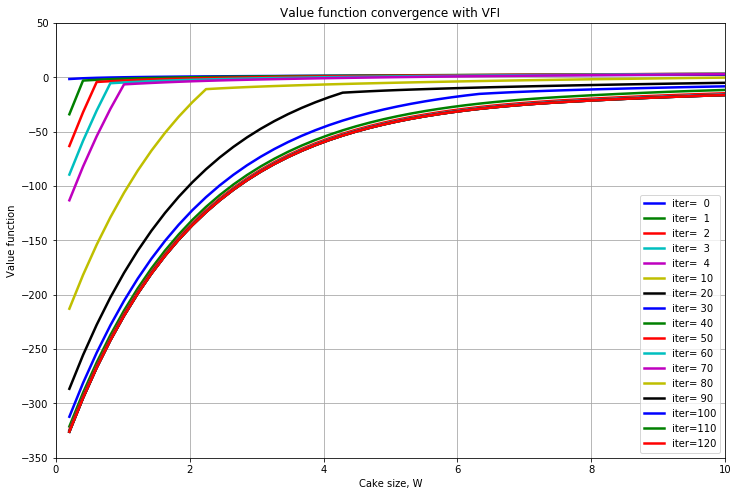

In [352]:
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.grid(b=True, which='both', color='0.65', linestyle='-')
ax1.set_title('Value function convergence with VFI')
ax1.set_xlabel('Cake size, W')
ax1.set_ylabel('Value function')

beta=.9
maxiter=500
V0=np.log(grid)
V0=np.zeros((1,ngrid))
for i in range(maxiter):
    V1=Bellman(V0)
    if i<5 or i%10==0:
        ax1.plot(np.squeeze(grid[0][1:]),np.squeeze(V1[0][1:]),label='iter={:3d}'.format(i),linewidth=2.5)
    diff1=np.max(V1-V0)
    if np.max(abs(V1-V0))<epsilon:
        break
    V0=V1

plt.legend(loc=4)
plt.savefig('cake1value.eps', format='eps', dpi=300)
plt.show()

